Acabou de sair a [lista da Forbes com as fortunas de 2013](http://epocanegocios.globo.com/Informacao/Resultados/noticia/2014/03/brasil-tem-65-bilionarios-saiba-quem-sao-eles.html) e neste ano lista de bilionários brasileiros conta com 65 integrantes.
A lista disponível neste site contém as seguintes informações dos afortunados:

- posição no ranking
- nome
- fortuna
- setor
- empresa

Foi aí eu tive a idéia de utilizar [pandas](http://pandas.pydata.org/) para fazer uma análise neste *dataset*. 
O objetivo é fazer uma análise dos setores onde poderemos observar:

- quantidade de bilionários por setor
- total de fortuna por setor
- fortuna per capita por setor

Nessa análise de setores vamos utilizar o agrupamento de dados no **pandas**, o método [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) e para a apresentação e gráficos o [matplotlib](http://matplotlib.org/).
Na sequência, vamos dar uma maqueada nos gráficos para valorizar a vizualização.

> **Disclaimer:** Na tabela obtida há indivíduos de uma mesma família ou empresa compartilhando uma mesma posição no ranking. Como o objetivo aqui é a manipulação de dados com o **pandas**, assumi que cada registro da tabela é independente dos demais.


In [235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import sys
%pylab inline
print 'python', sys.version
print 'pandas', pd.__version__
print 'statsmodels', sm.version.full_version

Populating the interactive namespace from numpy and matplotlib
python 2.7.6 (default, Nov 28 2013, 23:33:48) 
[GCC 4.2.1 Compatible Apple LLVM 5.0 (clang-500.2.79)]
pandas 0.13.0
statsmodels 0.5.0.dev-1bbd4ca


Vamos começar importando os dados e verificando se os tipos definidos estão de acordo com o que é esperado.

In [236]:
forbes = pd.read_csv('lista-forbes-2014.csv')
forbes.dtypes

Ranking      int64
Nome        object
Fortuna    float64
Setor       object
Empresa     object
dtype: object

Dados ok e tipos ok, sem surpresas, vamos seguir adiante.

## Começando o relacionamento com os dados

Tendo os dados em um ``DataFrame`` acho muito importante meter as mãos nos dados, imprimir e visualizar.
É necessário estabelecer uma relação com os dados, eles podem ter alguma coisa interessante pra te dizer, mas eles não vão chegar logo de cara entregando o jogo, 
é preciso começar um relacionamento, algo como começar dando as mãos.

Por esta razão que eu gosto de ver os dados e muitas vezes um *head* já ajuda a reduzir a ansiedade.

In [237]:
forbes.head()

,Ranking,Nome,Fortuna,Setor,Empresa
0,34,Jorge Paulo Lemann,19.7,Cerveja,AB/Inbev
1,55,Joseph Safra,16.0,Banco,Banco Safra
2,119,Marcelo Hermann Telles,10.2,Cerveja,AB/Inbev
3,137,João Roberto Marinho,9.1,Mídia,Globo
4,137,José Roberto Marinho,9.1,Mídia,Globo


Mas olhar os dados é muito importante e por isso fazer um gráfico é fundamental.
Dado que temos um conjunto finito gosto de utilizar um gráfico de barras para começar a interpretar a informação contida nos dados.

<Container object of 65 artists>

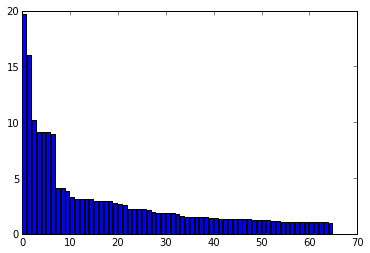

In [238]:
plt.bar(forbes.index, forbes['Fortuna'])

Bem, com essa primeira olhada já é possível ter uma idéia de como os dados estão distribuídos e eu arriscaria alguma coisa próxima a uma lei de potência, mas isso não nos interessa agora.
Seguindo adiante.

## Agrupando por setor

Agrupar os dados por setor no **pandas** é irritante de tão simples, nem no **R** é simples assim.
Basta utilizarmos o método ``groupby`` do ``DataFrame`` que retorna um ``DataFrameGroupBy`` que define os agrupamentos.
Esta classe possui uma propriedade ``groups`` onde conseguimos ter um idéia de como os grupos foram formados.

In [239]:
forbes_gb = forbes.groupby(by="Setor")
forbes_gb.groups

{'Alimentos': [7],
 'A\xc3\xa7o': [51],
 'Banco': [1, 10, 11, 25, 33, 39, 48, 52, 54],
 'Banco e minera\xc3\xa7\xc3\xa3o': [15, 16, 17, 18],
 'Bens de Consumo': [40],
 'Cal\xc3\xa7ados': [38],
 'Cerveja': [0, 2, 6, 9],
 'Constru\xc3\xa7\xc3\xa3o': [22, 23, 24, 35, 36, 37, 50],
 'Cosm\xc3\xa9ticos': [20, 26, 49],
 'Diversificado': [12, 13, 14, 60, 61, 63],
 'Educa\xc3\xa7\xc3\xa3o': [64],
 'Etanol': [30],
 'Ferro e minera\xc3\xa7\xc3\xa3o': [56],
 'G\xc3\xa1s e petroqu\xc3\xadmica': [53],
 'Hospitais': [44],
 'Igreja/ M\xc3\xaddia': [55],
 'Im\xc3\xb3veis': [42],
 'Ind\xc3\xbastria': [41, 46, 47],
 'Infraestrutura': [34],
 'Investimentos': [31],
 'M\xc3\xaddia': [3, 4, 5, 57, 58, 59],
 'Papel': [62],
 'Sa\xc3\xbade': [21, 28],
 'Seguros': [32],
 'Shopping': [43, 45],
 'Tecnologia': [8],
 'Varejo': [19, 27, 29]}

Note que esta estrutura é um ``dict`` com os setores como chaves e as linhas que pertencem aos setores como valores.
Olhando os grupos é possível observar que o setor **Banco** e **Construção** possuem os maiores números de integrantes.

O ``groupby`` nos retorna os agrupamentos, no entanto, para obter informação útil é necessário agregar os dados segundo alguma função ou métrica, vamos utilizar ``np.sum`` para calcularmos a Fortuna total por setor.
Ou seja, vamos agregar a coluna Fortuna por Setor e somar o valores e para isso vamos usar o método ``aggregate`` do ``DataFrame``.

In [240]:
sector_fortune = forbes_gb['Fortuna'].aggregate(np.sum)
sector_fortune

Setor
Alimentos              4.10
Aço                    1.20
Banco                 31.05
Banco e mineração     11.60
Bens de Consumo        1.40
Calçados               1.50
Cerveja               42.60
Construção            12.35
Cosméticos             6.00
Diversificado         12.45
Educação               1.00
Etanol                 1.90
Ferro e mineração      1.10
Gás e petroquímica     1.15
Hospitais              1.30
Igreja/ Mídia          1.10
Imóveis                1.30
Indústria              3.90
Infraestrutura         1.55
Investimentos          1.90
Mídia                 30.45
Papel                  1.05
Saúde                  4.50
Seguros                1.75
Shopping               2.60
Tecnologia             4.10
Varejo                 6.65
Name: Fortuna, dtype: float64

Está aí, o total de fortunas por setor e portanto, é preciso ver como fica.

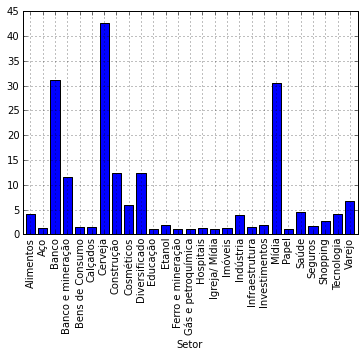

In [241]:
sector_fortune.plot(kind="bar")

O método *plot* do ``DataFrame`` ajuda bastante, pois os eixos já aparecem configurados.
Fica fácil ver que os setores Cerveja, Banco e Mídia destacam-se dos demais, ou seja, são os 3 setores mais ricos em nosso pais.

Outra informação interessante é saber quantos afortunados estão em cada setor.
Observando rapidamente os grupos vimos que Banco e Construção eram os mais representados, vamos verificar.

In [242]:
sector_count = forbes_gb['Fortuna'].aggregate(len)
sector_count

Setor
Alimentos             1
Aço                   1
Banco                 9
Banco e mineração     4
Bens de Consumo       1
Calçados              1
Cerveja               4
Construção            7
Cosméticos            3
Diversificado         6
Educação              1
Etanol                1
Ferro e mineração     1
Gás e petroquímica    1
Hospitais             1
Igreja/ Mídia         1
Imóveis               1
Indústria             3
Infraestrutura        1
Investimentos         1
Mídia                 6
Papel                 1
Saúde                 2
Seguros               1
Shopping              2
Tecnologia            1
Varejo                3
Name: Fortuna, dtype: float64

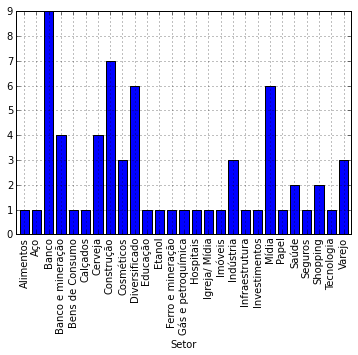

In [243]:
sector_count.plot(kind='bar')

De fato, Banco e Construção são os mais representados, seguidos de Diversificado e Mídia (entenda Diversificado como rico pra caramba!).

Com estes dois agrupamentos já temos:

- total de fortuna por setor: ``sector_fortune``
- quantidade de bilionários por setor: ``sector_count``

Vamos agora calcular a fortuna per capita por setor dividindo a fortuna do setor pela quantidade de indivíduos.

In [244]:
sector_fortune_by_person = sector_fortune/sector_count
sector_fortune_by_person

Setor
Alimentos              4.100000
Aço                    1.200000
Banco                  3.450000
Banco e mineração      2.900000
Bens de Consumo        1.400000
Calçados               1.500000
Cerveja               10.650000
Construção             1.764286
Cosméticos             2.000000
Diversificado          2.075000
Educação               1.000000
Etanol                 1.900000
Ferro e mineração      1.100000
Gás e petroquímica     1.150000
Hospitais              1.300000
Igreja/ Mídia          1.100000
Imóveis                1.300000
Indústria              1.300000
Infraestrutura         1.550000
Investimentos          1.900000
Mídia                  5.075000
Papel                  1.050000
Saúde                  2.250000
Seguros                1.750000
Shopping               1.300000
Tecnologia             4.100000
Varejo                 2.216667
Name: Fortuna, dtype: float64

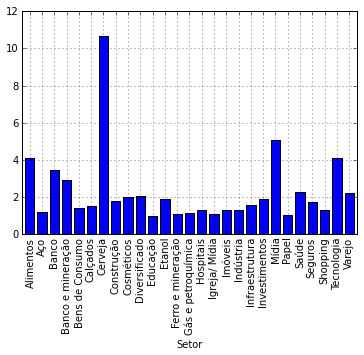

In [245]:
sector_fortune_by_person.plot(kind='bar')

Agora temos Cerveja e Mídia liderando com Alimentos e Tecnologia quase empatados na sequência.
O que é curioso, pois, nem Tecnologia nem Alimentos havia se destacado antes.

Uma coisa que facilita a interpretação é ordenar os dados.
É importante que os dados apresentem uma ordem que faça sentido.
Nos gráficos acima os setores estão em ordem alfabética, o que não ajuda muito a intepretar os resultados.
Vamos ordenar a fortuna per capita por valor e em ordem descrescente, a questão da ordem é pura preferência, no entanto gosto de ver dados como estes tentanto fazer um paralelo com distribuições e gosto de ver distribuições como um decaimento.
Para ordenar os dados utilizamos o método ``sort`` com o parâmetro ``ascending=False``.
Este método ordena a coleção *in-place*.

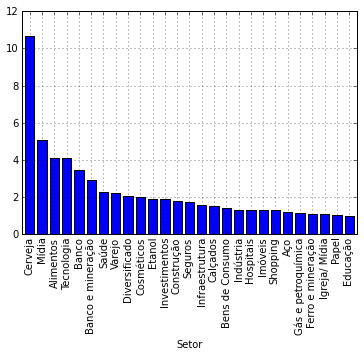

In [246]:
sector_fortune_by_person.sort(ascending=False)
sector_fortune_by_person.plot(kind='bar')

## Maqueando os gráficos

Maqueando aqui é no sentido de tornar os gráficos mais interessantes visualmente, não no sentido de falsificar a informação.
Por exemplo, acho que esse azul é feio e as *gridlines* não contribuem para uma melhor interpretação.
Vamos fazer uma série de mudanças para tornar o gráfico acima mais agradável aos olhos.
Mãos a obra.

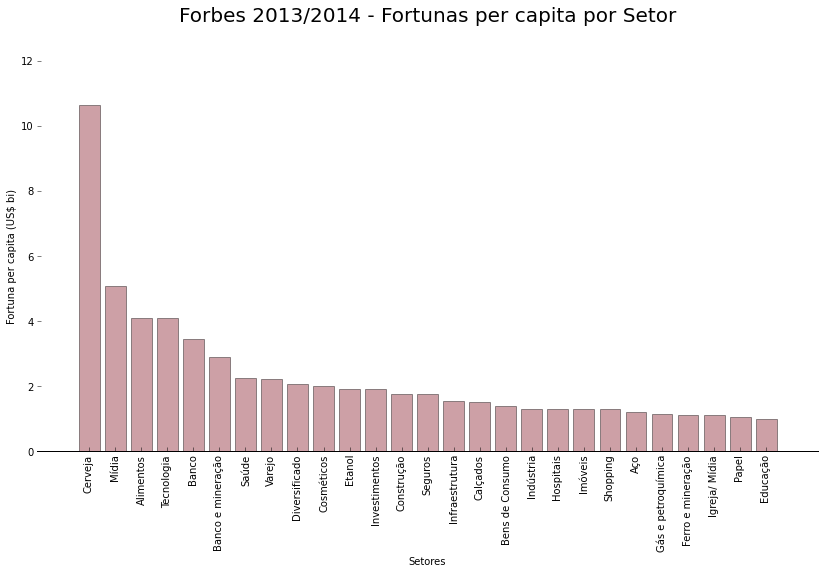

In [247]:
fig, ax = plt.subplots(figsize=(14,7))

xpos = np.arange(len(sector_fortune_by_person))
plt.bar(xpos+2, sector_fortune_by_person, align='center', color='#821122', alpha=0.4)
ticklabels = [s.decode('utf-8') for s in sector_fortune_by_person.index]
plt.xticks(xpos+2, ticklabels, rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Setores')
plt.ylabel('Fortuna per capita (US$ bi)')
plt.text(0.5, 1.1, 'Forbes 2013/2014 - Fortunas per capita por Setor',
         horizontalalignment='center', fontsize=20, transform = ax.transAxes)

Acho que agora está um pouco melhor, na minha opinião é claro.
Como é possível observar pelo código, os ajustes não vem de graça no **matplotlib**.
O método *plot* do **pandas** não é uma alternativa para preparar a versão final de um gráfico, e francamente eu não gosto desse método, acho que o esforço para construí-lo poderia ter sido empregado na melhoria da integração das estruturas de dados do **pandas** com o **matplotlib**.
No entanto, é uma ótima abordagem para *conhecer* os dados.
Gosto da abordagem do [R](http://cran.r-project.org/) onde há uma função *plot* que recebe qualquer coisa (que seja *plotável*) e monta o gráfico.
Francamente não gosto do **matplotlib**, acho ele demasiadamente burocrático e confuso, mas isso não invalida o fato de ser uma grande biblioteca e de extrema utilidade e como poderão observar a utilizo em diversos artigos.